# Übung 04
## Unsupervised Clustering & Feature Handling
Laden Sie die von Ihnen bearbeitete `.ipynb` Datei sowie ein dazugehöriges `requirements.txt` File in einer `.zip` Datei im Moodle Kurs hoch.
Vergessen Sie in Ihrer Abgabe nicht die entsprechende <font color='red'>Dokumentation</font>. Bitte geben Sie <font color='red'>Internetquellen</font> an, falls Sie Codeabschnitte aus dem Internet kopieren.

### Aufgabe 04.01 (5 Punkte)

Die Funktionalität von hierarchischem Clustering kann über mehrere Hyperparameter adaptiert werden. Dazu gehören die Distanzmetrik, ob das Clustering agglomerativ oder teilend (divisive) durchgeführt wird sowie die Linkage Methode mit der die Cluster verbunden werden. In der folgenden Aufgabe werden Sie den Einfluss unterschiedlicher Linkage Methoden auf verschiedene Datensätze überprüfen.
    
Hierarchisches Clustering hat den Vorteil gegenüber anderen Clusteringprozeduren, wie k-Means Clustering, dass keine Anzahl von Clusterzentren notwendig ist um das Clustering durchzuführen. Stattdessen kann ein Dendrogramm erstellt werden, in dem eine 'natürliche' Clusterbildung zu erkennen ist. Anhand des Dendrogramm kann dann entschieden werden, wie viele Cluster im Resultat vorhanden sein sollen. In der folgenden Aufgabe starten Sie direkt mit der Annahme, dass innerhalb der Datensätze jeweils zwei Cluster zu finden sind und erstellen erst im Nachhinein ein Dendrogramm um zu verifizieren, ob die Anzahl der Cluster für die Visualisierung sinnvoll war.
    
Im Zuge der Aufgabe sollen Sie mit folgenden Datensätzen arbeiten:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

1

In [2]:
def data1_spiral():
    """Returns a pandas data frame containing a data set with two features (feature1 and feature 2) which form a spiral 
       in a 2D scatter plot"""
    n_samples = 500
    np.random.seed(0)
    t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
    x = t * np.cos(t)
    y = t * np.sin(t)
    
    data1 = np.concatenate((x, y))
    data1 += .6 * np.random.randn(2, n_samples)
    data1 = data1.T
    
    return pd.DataFrame(data=data1, columns=["feature1", "feature2"])

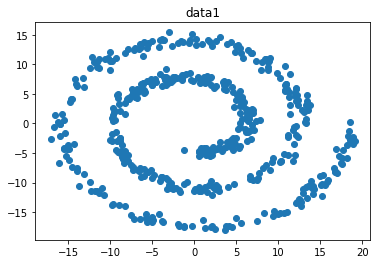

In [3]:
data1 = data1_spiral()
plt.scatter(data1.feature1, data1.feature2)
plt.title("data1")
plt.show()

In [4]:
def data2_blobs():
    """Returns a pandas data frame containing a data set with two features (feature1 and feature2) which form four blobs 
       in a 2D scatter plot"""
    data2, _ = datasets.make_blobs(n_samples=500,
                                   centers=4, 
                                   cluster_std=0.6,
                                   n_features=2,
                                   random_state=0)
    return pd.DataFrame(data=data2, columns=["feature1", "feature2"])

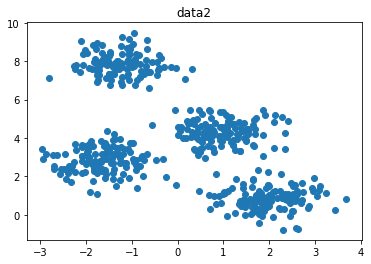

In [5]:
data2 = data2_blobs()
plt.scatter(data2.feature1, data2.feature2)
plt.title("data2")
plt.show()

In [6]:
def data3_moons():
    """Returns a pandas data frame containing a data set with two features (feature1 and feature2) which form 
       interleaving half circles in a 2D scatter plot"""
    data3, _ = datasets.make_moons(n_samples=500, 
                                   noise=0.06,
                                   random_state=0)
    
    return pd.DataFrame(data=data3, columns=["feature1", "feature2"])

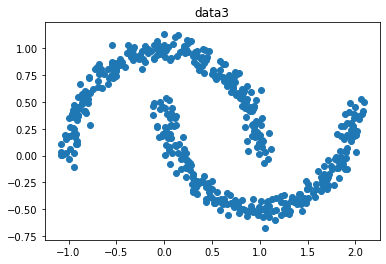

In [7]:
data3 = data3_moons()
plt.scatter(data3.feature1, data3.feature2)
plt.title("data3")
plt.show()

Im Zuge der Aufgabe soll für die drei Datensätze hierarchisches Clustering mit verschiedenen Linkage Methoden durchgeführt werden. Im Anschluss sollen die Ergebnisse visualisiert werden.

- Führen Sie für alle drei Datensätze unsupervised Clustering mithilfe der Scikit-learn Implementierung von agglomerativem Clustering (`sklearn.cluster.AgglomerativeClustering`) durch
- Belassen sie die Anzahl der Cluster auf zwei
- Verwenden Sie dafür alle vier zur Verfügung stehenden Linkage Methoden (also 12 Clustering Vorgänge insgesamt)
- Visualisieren die Ergebnisse in zwölf 2D Scatter Plots und machen Sie die Zuordnung zu den jeweiligen Clustern kenntlich (z.B. durch Farbmarkierungen)
- Suchen Sie sich eine Linkage Methode aus, für die Sie den Clusteringvorgang von Datensatz data2 via Dendrogramm visualisieren (Es steht Ihnen hier frei welche Bibliothek Sie für das Clustering und die Visualisierung verwendenden, z.B. `scipy.cluster.hierarchy`)
- Beantworten Sie basierend auf den Ergebnissen, ob ein Clustering von data2 in zwei Cluster sinnvoll erscheint und warum bzw. warum nicht

In [8]:
# TODO

### Aufgabe 04.02 (10 Punkte, exklusive 5 Bonuspunkte)

Die Hauptkomponentenanalyse (PCA) ist vermutlich die prominenteste aller Dimensionalitätsreduktionsvarianten. Unter anderem kann sie im maschinellen Lernen zur Visualisierung von hochdimensionalen Datensätzen sowie zur Featurereduktion eingesetzt werden. Im Zuge der Übung soll eine PCA zur Featurereduktion durchgeführt werden. Anhand einer Klassifizierung soll ein Vergleich zwischen reduziertem und nicht reduziertem Datensatz durchgeführt werden. Für die Klassifizierung soll ein einfaches neurales Netzwerk verwendet werden, da sich die Vorteile der Dimensionalitätsreduktion hier am besten zeigen. Beachten Sie bei der Evaluierung der Resultate, die beachtliche Reduktion der Featureanzahl.

Der Datensatz für diese Übung befindet sich im Ordner "Data_Exercise04" und hat den Namen "data.csv". Der Datensatz stellt eine vereinfachte Variante des "Gastrointestinal Lesions in Regular Colonoscopy Data Set" vom UCI machine learning repository dar (https://archive.ics.uci.edu/ml/datasets/Gastrointestinal+Lesions+in+Regular+Colonoscopy#).

1) Explorative Datenanalyse (3 Punkte)
- Werfen Sie einen Blick auf den obenstehenden Link um sich ein Bild vom verwendeten Datensatz zu machen (Der Ihnen zur Verfügung gestellte Datensatz unterscheidet bezüglich der Labels nur zwischen Adenom und Nicht-Adenom)
- Lesen Sie den Datensatz ein und geben Sie die Anzahl der Features und Samples aus
- Versichern Sie sich über die Label Balance des Datensatzes (z.B. mithilfe von `np.unique()`)

2) Klassifizierung mittels Multilayer Perceptron Classifier (3 Punkte)
- Verwenden Sie 10-fold Cross-Validation
- Führen Sie pro Fold eine Standardisierung des Datensatzes durch
- Verwenden Sie die Scikit-Learn Implementierung des MLPClassifiers (`sklearn.neural_network.MLPClassifier`)
- Geben Sie die durchschnittliche Performance über die Folds als Accuracy aus

3) Dimensionalitätsreduktion mit anschließender Klassifizierung via Multilayer Perceptron Classifier (4 Punkte)
- Verwenden Sie 10-fold Cross-Validation
- Führen Sie pro Fold eine Standardisierung des Datensatzes durch
- Führen Sie pro Fold eine PCA durch und selektieren Sie die 50 besten Hauptkomponenten
- Diese 50 Hauptkomponenten sollen im Folgenden als Features für die Klassifizierung dienen
- Verwenden Sie die erneut den MLPClassifiers - verwenden Sie dabei die selben Hyperparameter wie zurvor
- Geben Sie die durchschnittliche Performance über die Folds als Accuracy aus

BONUS: (5 Punkte)
- Geben Sie die Varianz, die insgesamt durch die 50 Hauptkomponenten erklärt wird als Durchschnitt über alle Folds aus

In [9]:
# TODO